In [1]:
import pandas as pd
from ShaDoC import retriver_eval as r
from tqdm import tqdm
import time

In [121]:
df = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv')
df

,Package,Java API,Question,SISE,CROKAGE,DocChameleon,SISE_context_relevancy,CROKAGE_context_relevancy,DocChameleon_context_relevancy
0,applet,Applet,Loading and displaying local Images in Java Ap...,<p>If you re still seeing an Illegal Escape C...,It's likely the image can't be accessed from i...,"['""""""How can I display an image in the Applet?...",0.166667,1.000000,0.968889
1,applet,Applet,Classloader in Applet: Cant access files,<p>If you re still seeing an Illegal Escape C...,Classloader hierarchy\nWhenever a new JVM is s...,"['""""""Classloader in Applet: Can\'t access file...",0.166667,0.388889,1.000000
2,applet,Applet,How to access a file in a Java Applet?,<p>If you re still seeing an Illegal Escape C...,You need to wrap your code in AccessController...,"['""""""Accessing files from a Java Applet\n\nI\'...",0.166667,0.333333,0.280000
3,swing,JPanel,how to set JFrame background transparent but J...,<p>If you are using JPanels then are probably...,I found another solution.\n\nSet the backgroun...,"['""""""how to set JFrame background transparent ...",0.072464,1.000000,1.000000
4,swing,JPanel,How to set a transparent background of JPanel?,<p>If you are using JPanels then are probably...,You could use setOpaque() to make the backgrou...,"['""""""I want to create a semi-transparent JPane...",0.072464,0.136364,0.437500
5,swing,JPanel,How to make JFrame background and JPanel trans...,<p>If you are using JPanels then are probably...,I try it on my computer and image is showing u...,"['""""""How to make JFrame background and JPanel ...",0.072464,1.000000,1.000000
6,swing,JFrame,java: How to add Transparent Gradient Backgrou...,By allowing separate <code>JFrame</code>s you...,I found another solution.\n\nSet the backgroun...,"['""""""How can I overide this for child jpanel ?...",0.466667,0.142857,0.096154
7,swing,JFrame,Swing: Obtain Image of JFrame,By allowing separate <code>JFrame</code>s you...,I believe you are looking for internal frames....,"['""""""Adding image to JFrame\n\nSo I am using E...",0.466667,1.000000,0.777778
8,swing,JFrame,Transparent JFrame background,By allowing separate <code>JFrame</code>s you...,You should make content pane transparent too.\...,"['""""""Transparent JFrame background\n\nIs it po...",0.466667,1.000000,1.000000
9,io,Serializable,Java Serializable Object to Byte Array,<p>To add to the other answers by implementat...,If the object array contains Serializable obje...,"['""""""Java Serializable Object to Byte Array\n\...",0.158416,0.250000,0.900000


In [54]:
half1 = df.iloc[:len(df)//2]
half2 = df.iloc[len(df)//2:]
print(half1.shape)
print(half2.shape)

(23, 5)
(24, 5)


In [ ]:
values1 = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    docs, urls = r.context_retrieval(row['Question'])
    time.sleep(8)
    values1.append(str(docs))
# df['DocChameleon'] = values1
# df.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv', index=False)

In [22]:
half1 = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative0.csv')
half2 = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative3.csv')

In [ ]:
# values2 = []
# for index, row in tqdm(half2.iterrows(), total=half2.shape[0]):
#     result = r.context_retrieval(row['Question'])
#     values2.append(str(result[0]))

# half2['DocChameleon'] = values2
# half2.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative2.csv', index=False)

In [ ]:
# result_df = pd.concat([half1, half2], axis=0)
# result_df.reset_index(drop=True, inplace=True)
# result_df.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results.csv', index=False)
result_df = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv')
result_df

## Contenxt Relevancy

In [108]:
# df['CROKAGE'] = df['CROKAGE'].apply(lambda x: [x])
type(df['CROKAGE'][0])

str

In [122]:
from ragas.metrics import context_relevancy

import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/.env")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") 

from langchain_openai import ChatOpenAI
agent_llm = ChatOpenAI(temperature=0, model_name="gpt-4o")

from ragas import evaluate
from datasets import Dataset

def compute_context_relevancy(df):
    df['SISE'] = df['SISE'].apply(lambda x: [str(x)])
    
    data = {
    "question": df['Question'],
    "contexts": df['SISE']
    }
    metrics = [context_relevancy]

    # # Create a Dataset object
    dataset = Dataset.from_dict(data)
    eval = evaluate(dataset, metrics=metrics, llm=agent_llm)
    res = eval.to_pandas()
    return res

result = compute_context_relevancy(df)
result.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/temp_SISE.csv')

Evaluating:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
def merge_and_rename(df1, df2, column_to_merge, new_column_name):
    merged_df = df1.join(df2[[column_to_merge]], how='left')
    merged_df = merged_df.rename(columns={column_to_merge: new_column_name})
    return merged_df

result_df = merge_and_rename(result_df, result, "context_relevancy", "DocChameleon_onlySO_context_relevancy")
result_df.to_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/final_quantitative_results.csv',index=False)

### Analysis

In [124]:
from scipy.stats import f_oneway
results = pd.read_csv('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/quantitative_results_new.csv')

In [126]:
anova_result = f_oneway(results['SISE_context_relevancy'], results['CROKAGE_context_relevancy'], results['DocChameleon_context_relevancy'])
print(f'ANOVA result: {anova_result}')

ANOVA result: F_onewayResult(statistic=39.14438628081929, pvalue=2.3521621780591177e-14)


In [127]:
from scipy.stats import mannwhitneyu
import pingouin as pg

def mann_whitney(tool1, tool2, group1, group2):
    print(f"{tool1} vs {tool2}")
    print(f"{'='*10}")

    stat, p_value = mannwhitneyu(group1, group2)
    effect_size = pg.compute_effsize(group2, group1, eftype='cohen')
    print(f'Mann-Whitney U statistic: {stat}')
    print(f'p-value: {p_value}')
    print(f'effect-size: {effect_size}\n\n')

mann_whitney("SISE", "CROKAGE", results['SISE_context_relevancy'], results['CROKAGE_context_relevancy'])
mann_whitney("SISE", "DocChameleon", results['SISE_context_relevancy'], results['DocChameleon_context_relevancy'])
mann_whitney("CROKAGE", "DocChameleon", results['CROKAGE_context_relevancy'], results['DocChameleon_context_relevancy'])

SISE vs CROKAGE
Mann-Whitney U statistic: 434.0
p-value: 1.6921640579023946e-08
effect-size: 1.1947560758166338


SISE vs DocChameleon
Mann-Whitney U statistic: 303.0
p-value: 5.4236494594122175e-11
effect-size: 1.821166982615465


CROKAGE vs DocChameleon
Mann-Whitney U statistic: 908.0
p-value: 0.01697968943905978
effect-size: 0.5470302422261624




In [128]:
def stats(tool, column):
    print(f"{tool}")
    print(f"{'='*10}")
    mean = column.mean()
    max = column.max()
    min = column.min()
    print(f"\tAverage: {mean}")
    print(f"\tMax: {max}")
    print(f"\tMin: {min}")

stats("SISE", results['SISE_context_relevancy'])
stats("CROKAGE", results['CROKAGE_context_relevancy'])
stats("DocChameleon", results['DocChameleon_context_relevancy'])

SISE
	Average: 0.22950977836
	Max: 1.0
	Min: 0.0
CROKAGE
	Average: 0.5621352659
	Max: 1.0
	Min: 0.111111111
DocChameleon
	Average: 0.7324928089000001
	Max: 1.0
	Min: 0.096153846


/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_1184/2128552279.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


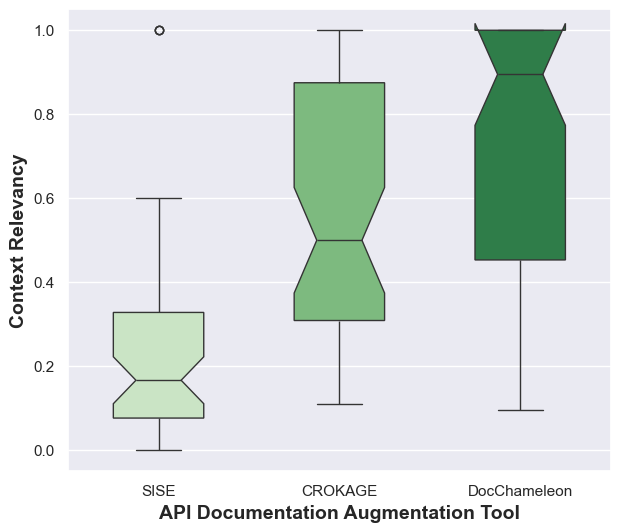

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()

df_selected = results[['SISE_context_relevancy', 'CROKAGE_context_relevancy', 'DocChameleon_context_relevancy']]
df_melted = df_selected.melt(var_name='Tool', value_name='Relevancy')

# Create notched box plots
plt.figure(figsize=(7, 6))
ax = sns.boxplot(x='Tool', y='Relevancy', hue='Tool',data=df_melted, notch=True, width=0.5, palette='Greens')
custom_labels = ['SISE', 'CROKAGE', 'DocChameleon']
ax.set_xticklabels(custom_labels)
# plt.xticks(rotation=15)

# Add title and labels
# plt.title('Notched Box Plots of Tool Performance')
plt.xlabel('API Documentation Augmentation Tool', fontsize=14, fontweight='bold')
plt.ylabel('Context Relevancy', fontsize=14, fontweight='bold')
plt.savefig('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/figures/context_relevancy.pdf')

# Show the plot
plt.show()

In [80]:
from urllib.parse import urlparse

def get_word_from_url(url, position):
    # Parse the URL
    parsed_url = urlparse(url)
    
    # Extract the path and split it into segments
    path_segments = parsed_url.path.strip('/').split('/')
    print(path_segments)
    
    # Check if the position is within the bounds of the path segments
    if 0 <= position < len(path_segments):
        return path_segments[position]
    else:
        return None

# Example URL
url = 'https://www.coursera.org/collections/tensorflow-keras-projects-beginners'

# Get the word at the specified position (1 for "collections")
word = get_word_from_url(url, 0)

print(f"The word at position 1 is: {word}")


['collections', 'tensorflow-keras-projects-beginners']
The word at position 1 is: collections
